<a href="https://colab.research.google.com/github/kylelee417/Data-Science_Portfolio/blob/master/VAE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
testing = 1

In [0]:
#source:https://darektidwell.com/using-selenium-with-google-colaboratory/
# Install cromium, its driver, and selenium
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

# Set options to be headless
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.webite-url.com")

     |████████████████████████████████| 911kB 2.8MB/s 
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Packages [12.3 kB]
Get:12 http://ar

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# New Section

In [0]:
!pip install google_images_download

  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14547 sha256=9c7394ef163f0cc100fdfbd338a1f776b01cff7ad62d8cda23755d044cba1076
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [0]:
from google_images_download import google_images_download
import os
ori_path = os.getcwd()
data_path = os.path.join(ori_path,'downloads')
data_path

'/content/downloads'

In [0]:
#creating object
response = google_images_download.googleimagesdownload()

search_queries = ['man hairstyle top view',
                 'women hairstyle top view']


In [0]:
def downloadimages(query):
    arguments = dict(keywords=query,
                    limit=1000,
                    format='jpg',
                    size = 'medium',
                    chromedriver= '/usr/lib/chromium-browser/chromedriver',
                    aspect_ratio='square',
                    silent_mode=True)
    try: 
        response.download(arguments)     
    except FileNotFoundError:  
        arguments = dict(keywords=query,
                    limit=20,
                    format='jpg',
                    size = 'medium',     
                    aspect_ratio='square',
                    print_urls=False)                       
        try:  
            response.download(arguments)  
        except: 
            pass

In [0]:
# Driver Code 

download_msg = []
for query in search_queries: 
    downloadimages(query)
    msg = 'Downloaded {} {} images!'.format(len(os.listdir(os.path.join(data_path,query))),query)
    download_msg.append(msg)
for msg in download_msg:
    print(msg)

Getting you a lot of images. This may take a few moments...


KeyboardInterrupt: ignored

In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from glob import glob #retriving an array of files in directories
from keras.models import Sequential #for neural network models
from keras.layers import Input, Dense, Flatten,Conv2D, ZeroPadding2D, MaxPooling2D, Dropout, UpSampling2D # Import hidden layer
from keras.optimizers import Adam #For Optimizing the Neural Network
from keras.preprocessing.image import ImageDataGenerator #Data augmentation and preprocessing
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.


In [0]:

men_hair = "/content/drive/My Drive/downloads/"
women_hair = "/content/drive/My Drive/downloads/"

In [0]:
men_hair

'/content/drive/My Drive/downloads/'

In [0]:
img_all_train = glob(men_hair+"/man hairstyle top view/train/*.jpg")
img_all_train += glob(women_hair+"women hairstyle top view/train/*.jpg") 

img_all_test = glob(men_hair+"/man hairstyle top view/test/*.jpg")
img_all_test += glob(women_hair+"women hairstyle top view/test/*.jpg") 


In [139]:
t1_path = "/content/drive/My Drive/downloads/test1.jpg"

t1 = cv2.imread(t1_path,0)
t1 = cv2.resize(t1, (96,96))
t1 = t1.astype(np.float32)/255.
t1 = np.expand_dims(t1,-1)
t1.shape

(96, 96, 1)

In [5]:
#source:https://www.kaggle.com/aakashnain/beating-everything-with-depthwise-convolution
# Preparing train, test data


train_data = []
test_data = []

#Train
for img in img_all_train:
    img = cv2.imread(str(img),0)
    img = cv2.resize(img, (96,96))
   
    img = img.astype(np.float32)/255.
    img = np.expand_dims(img,-1)
    train_data.append(img)
    
#Test                      
for img in img_all_test:
    img = cv2.imread(str(img),0)
    img = cv2.resize(img, (96,96))
    
    img = img.astype(np.float32)/255.
    img = np.expand_dims(img,-1)
    test_data.append(img)
    

train_data = np.array(train_data)
test_data = np.array(test_data)

print("Total number of train examples: ", train_data.shape)
print("Total number of test examples:", test_data.shape)

Total number of train examples:  (857, 96, 96, 1)
Total number of test examples: (263, 96, 96, 1)


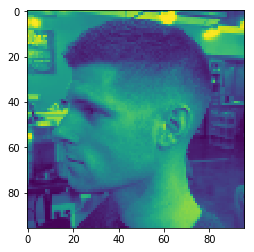

In [0]:
plt.imshow(train_data[0])

In [244]:
#source:https://www.kaggle.com/aakashnain/beating-everything-with-depthwise-convolution
# Preparing train, test data


train_data = []
test_data = []

#Train
for img in img_all_train:
    img = cv2.imread(str(img),0)
    img = cv2.resize(img, (96,96))
   
    img = img.astype(np.float32)/255.
    img = np.expand_dims(img,-1)
    train_data.append(img)
    
#Test                      
for img in img_all_test:
    img = cv2.imread(str(img),0)
    img = cv2.resize(img, (96,96))
    
    img = img.astype(np.float32)/255.
    img = np.expand_dims(img,-1)
    test_data.append(img)
    

train_data = np.array(train_data)
test_data = np.array(test_data)

print("Total number of train examples: ", train_data.shape)
print("Total number of test examples:", test_data.shape)

Total number of train examples:  (857, 96, 96, 1)
Total number of test examples: (263, 96, 96, 1)


In [0]:
from keras import regularizers

# this is our input placeholder
input_img = Input(shape=(96,96,1))

#encoder part
x = Conv2D(512,(3,3),activity_regularizer=regularizers.l1(10e-5), activation='relu', padding='same', name="encoded1")(input_img) # add Layer l1 activity regularizer , mimicing PCA
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name="encoded2")(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name="encoded3")(x)
x = MaxPooling2D((2, 2), padding='same')(x)                
x = Conv2D(16, (3, 3), activation='relu', padding='same', name="encoded4")(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(8, (3, 3), activation='relu', padding='same', name="bottleneck")(x)

          

#decoder part
x = Conv2D(64, (3, 3), activation='relu', padding='same', name="decoded1")(encoded)
x = UpSampling2D((2, 2))(x)          
x = Conv2D(128, (3, 3), activation='relu', padding='same', name="decoded2")(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name="decoded3")(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name="decoded4")(x)                   
x = UpSampling2D((2, 2))(x)             
x = Conv2D(1,(3,3), activation='relu', padding='same', name="decoded5")(x)

decoded = Conv2D(1,(1,1), activation='sigmoid',padding='same', name="decoded_output")(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img,decoded)

W0805 21:27:27.319683 140269666125696 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(96, 96, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 96, 96, 1)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 96, 96, 16)        160       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 48, 48, 8)         1160      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 24, 24, 8)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 8)         584       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 12, 12, 8)         0         
__________

In [0]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
autoencoder.fit(train_data, train_data,
                epochs=50,
                batch_size=16,
                shuffle=True,
                validation_data=(test_data, test_data))

Train on 857 samples, validate on 263 samples
Epoch 1/50
857/857 [==============================] - 1s 1ms/step - loss: 0.5521 - val_loss: 0.5639
Epoch 2/50
857/857 [==============================] - 1s 1ms/step - loss: 0.5514 - val_loss: 0.5501
Epoch 3/50
857/857 [==============================] - 1s 1ms/step - loss: 0.5513 - val_loss: 0.5528
Epoch 4/50
857/857 [==============================] - 1s 1ms/step - loss: 0.5474 - val_loss: 0.5552
Epoch 5/50
857/857 [==============================] - 1s 1ms/step - loss: 0.5498 - val_loss: 0.5474
Epoch 6/50
857/857 [==============================] - 1s 1ms/step - loss: 0.5476 - val_loss: 0.5537
Epoch 7/50
857/857 [==============================] - 1s 1ms/step - loss: 0.5474 - val_loss: 0.5427
Epoch 8/50
857/857 [==============================] - 1s 1ms/step - loss: 0.5476 - val_loss: 0.5474
Epoch 9/50
857/857 [==============================] - 1s 1ms/step - loss: 0.5452 - val_loss: 0.5422
Epoch 10/50
857/857 [==============================] -

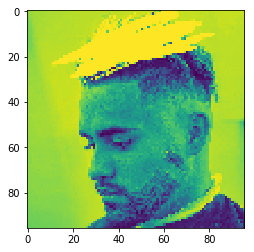

In [140]:
plt.imshow(t1.reshape(96,96))

In [0]:
result_imgs = autoencoder.predict(test_data, batch_size=1, verbose=1)

263/263 [==============================] - 1s 2ms/step


In [141]:
t1 = np.expand_dims(t1,0)
print(t1.shape)

(1, 96, 96, 1)


In [0]:
t1_img = autoencoder.predict(t1, batch_size=1)

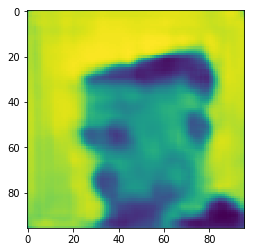

In [0]:
plt.imshow(t1_img.reshape(96,96))

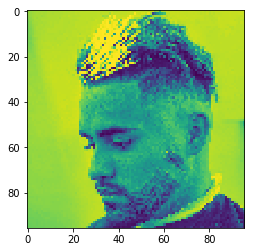

In [0]:
plt.imshow(t1_.reshape(96,96))

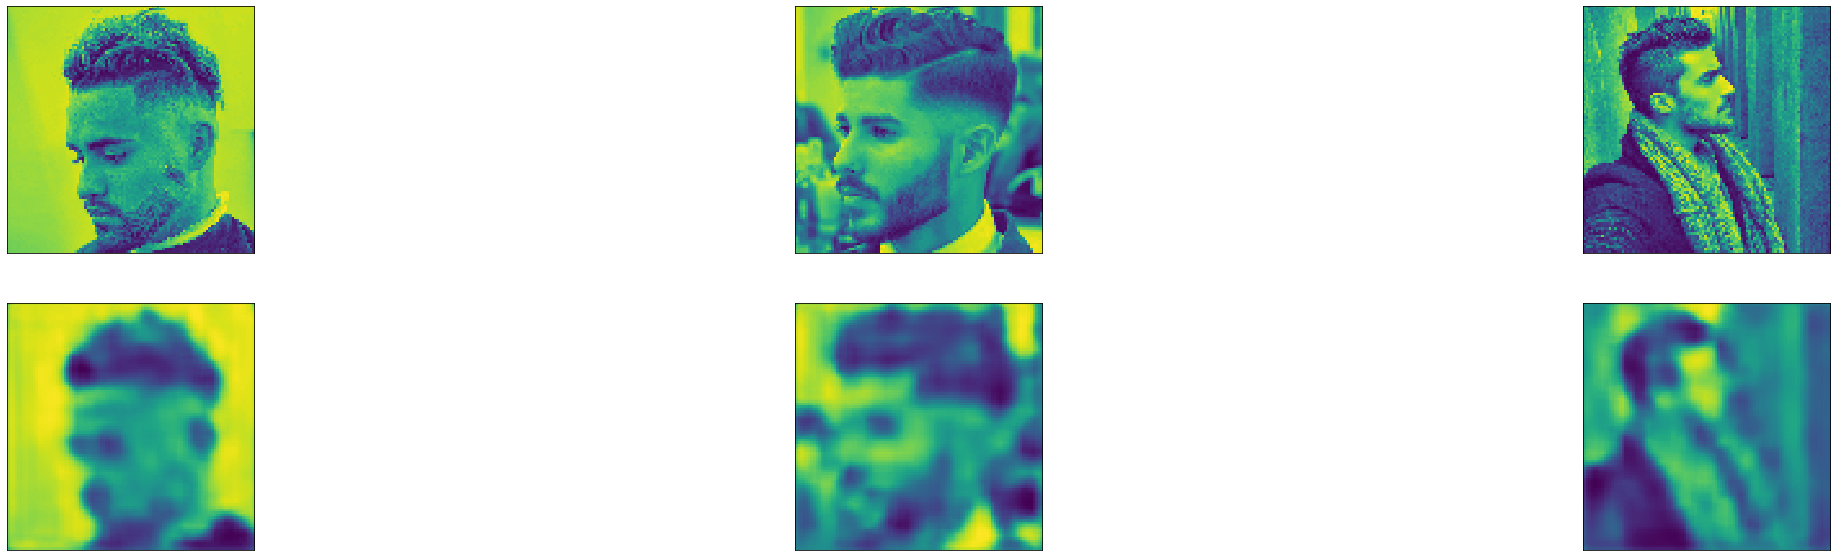

In [0]:
import matplotlib.pyplot as plt

n = 1  # how many digits we will display
plt.figure(figsize=(40, 10))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_data[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(result_imgs[i].reshape(96,96))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
#dependencies (numpy, matplotlib, and keras)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import objectives


In [0]:
input_img = keras.Input(shape=(96, 96, 1))  # adapt this if using `channels_first` image data format

x = layers.Conv2D(32, 3,
                  padding='same', 
                  activation='relu')(input_img)
x = layers.Conv2D(64, 3,
                  padding='same', 
                  activation='relu',
                  strides=(2, 2))(x)
x = layers.Conv2D(64, 3,
                  padding='same', 
                  activation='relu')(x)
x = layers.Conv2D(64, 3,
                  padding='same', 
                  activation='relu')(x)
# need to know the shape of the network here for the decoder
shape_before_flattening = K.int_shape(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

# Two outputs, latent mean and (log)variance
z_mu = layers.Dense(latent_dim)(x)
z_log_sigma = layers.Dense(latent_dim)(x)

In [38]:
print(z_mu)
print(z_log_sigma)

Tensor("dense_14/BiasAdd:0", shape=(?, 2), dtype=float32)
Tensor("dense_15/BiasAdd:0", shape=(?, 2), dtype=float32)


In [0]:
# sampling function
def sampling(args):
    z_mu, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mu)[0], latent_dim),
                              mean=0., stddev=1.)
    return z_mu + K.exp(z_log_sigma) * epsilon

# sample vector from the latent distribution
z = layers.Lambda(sampling)([z_mu, z_log_sigma])

In [31]:
decoder_h = Dense(2, activation='relu')
decoder_mean = Dense(2, activation='relu')
h_decoded = decoder_h(z)
dec = decoder_mean(h_decoded)
print(dec)

Tensor("dense_17/Relu:0", shape=(?, 2), dtype=float32)


In [0]:
# decoder takes the latent distribution sample as input
decoder_input = layers.Input(K.int_shape(dec)[1:])

# Expand to 784 total pixels
x = layers.Dense(np.prod(shape_before_flattening[1:]),
                 activation='relu')(decoder_input)

# reshape
x = layers.Reshape(shape_before_flattening[1:])(x)

# use Conv2DTranspose to reverse the conv layers from the encoder
x = layers.Conv2DTranspose(32, 3,
                           padding='same', 
                           activation='relu',
                           strides=(2, 2))(x)
z_decoded = layers.Conv2D(1, 3,
                  padding='same', 
                  activation='sigmoid')(x)

In [25]:
print(z_decoded)

Tensor("conv2d_8/Sigmoid:0", shape=(?, 96, 96, 1), dtype=float32)


In [37]:
vae = Model(input_img,z_decoded)

ValueError: ignored

In [0]:
_def vae_loss(x, x_decoded_mean):
    xent_loss = objectives.binary_crossentropy(x, x_decoded_mean)
    kl_loss = - 0.5 * K.mean(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis=-1)
    return xent_loss + kl_loss

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

from scipy.stats import norm

import keras
from keras import layers
from keras.models import Model
from keras import metrics
from keras import backend as K   # 'generic' backend so code works with either tensorflow or theano

# construct a custom layer to calculate the loss
class CustomVariationalLayer(keras.layers.Layer):

    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        # Reconstruction loss
        xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        # KL divergence
        kl_loss = -5e-4 * K.mean(1 + z_log_sigma - K.square(z_mu) - K.exp(z_log_sigma), axis=-1)
        return K.mean(xent_loss + kl_loss)

    # adds the custom loss to the class
    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        return x

# apply the custom loss to the input images and the decoded latent distribution sample
y = CustomVariationalLayer()([input_img, z_decoded])

In [34]:
# VAE model statement
vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)
vae.summary()

ValueError: ignored